In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data, split_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/home/ivan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [4]:
df = load_dataset(split=False)

In [5]:
#metal = df[df.category == 'metal']
#country = df[df.category == 'country']
#df = metal.append(country)

In [6]:
df.shape

(20653, 25)

In [7]:
x = df.drop(['category'], axis=1)
y = pd.get_dummies(df['category'])

In [8]:
#y = (y == 'country') + 0

In [9]:
#countries = np.sum(y == 1)
#metals = np.sum(y == 0)
#print("Country songs: ", countries)
#print("Metal songs: ", metals)

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, stratify=y)

/home/ivan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
def one_hot(y, C):
    y_one_hot = np.zeros((y.shape[0], C))
    y_one_hot[np.arange(0, y.shape[0]), y] = 1
    
    return y_one_hot

In [12]:
number_of_classes = len(df['category'].unique())
#y_train = one_hot(y_train, number_of_classes)
#y_test = one_hot(y_test, number_of_classes)

In [13]:
y_train.shape
y_test.shape

(6196, 14)

In [14]:
x_train.shape

(14457, 24)

In [15]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [16]:
x_train, x_test = scale_data(x_train, x_test)

In [17]:
model = Sequential()

In [18]:
model.add(Dense(units = 60, input_dim = number_of_features, activation = 'relu'))

In [19]:
model.add(Dense(units=30, activation='relu'))

In [20]:
model.add(Dense(units = output_size, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 14)                434       
Total params: 3,764
Trainable params: 3,764
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, epochs= 20, batch_size=32, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=3)])

In [24]:
epochs = history.epoch

In [25]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

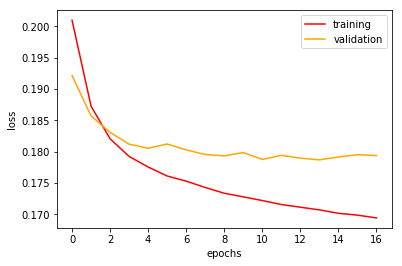

In [26]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [27]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

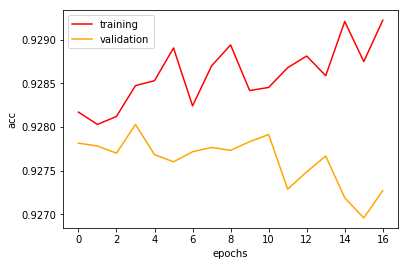

In [28]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [29]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

6196/6196 [==============================] - 7s 1ms/step
Test loss: 0.17853679620042165, test accuracy: 0.9273839523670672


In [30]:
#model.fit(x_train, y_train, epochs=7, batch_size=32)

In [31]:
print(x_test[1:2])
print(y_test[1:2]) # metal

[[ 1.48736650e+00 -2.60471899e-03  7.55499480e-01 -1.32824875e+00
   5.87256088e-02 -2.91521708e-01 -5.99526426e-01 -6.29000167e-01
   9.35695321e-01  6.75274865e-01 -2.69785146e-01  2.24872039e-01
  -3.34778917e-01 -2.60846277e-01 -2.87819799e-01 -3.60286260e-01
  -3.39739890e-01 -3.45035450e-01 -1.80060056e-01 -2.83713365e-01
  -2.86549784e-01  3.82260527e+00 -3.68204538e-01 -2.72307043e-01]]
      chill  classical  country  hiphop  indie_alt  jazz  latin  metal  party  \
4666      1          0        0       0          0     0      0      0      0   

      pop  punk  rnb  rock  workout  
4666    0     0    0     0        0  


In [32]:
model.predict(x_test[1:2])

array([[1.9209318e-01, 1.9614458e-01, 2.1255186e-03, 7.7687427e-02,
        2.7061994e-03, 3.6296083e-04, 3.1375554e-01, 2.4945519e-04,
        8.9643419e-02, 9.6849343e-03, 5.9589354e-04, 4.8064068e-02,
        1.7154904e-02, 4.9731918e-02]], dtype=float32)

In [33]:
# model je ispravno pogodio!